In [1]:
import os 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

import pystan
from criterion import Criterion

import arviz
import pickle

from IPython.display import display

In [2]:
data = pd.read_csv(Path(os.getcwd(), "input", "data-attendance-3.txt"))

In [3]:
display(data.head())
display(data.describe())

,PersonID,A,Score,Weather,Y
0,1,0,69,B,1
1,1,0,69,A,1
2,1,0,69,C,1
3,1,0,69,A,1
4,1,0,69,B,1


,PersonID,A,Score,Y
count,2396.000000,2396.000000,2396.000000,2396.000000
mean,24.217028,0.464942,122.856427,0.718698
std,13.996647,0.498874,25.700545,0.449728
min,1.000000,0.000000,51.000000,0.000000
25%,12.000000,0.000000,106.000000,0.000000
50%,23.000000,0.000000,122.000000,1.000000
75%,36.000000,1.000000,145.000000,1.000000
max,50.000000,1.000000,185.000000,1.000000


In [4]:
data["Weather"] = data["Weather"].replace({"A":0, "B":0.2, "C":1})

In [6]:
data

,PersonID,A,Score,Weather,Y
0,1,0,69,0.2,1
1,1,0,69,0.0,1
2,1,0,69,1.0,1
3,1,0,69,0.0,1
4,1,0,69,0.2,1
...,...,...,...,...,...
2391,50,1,99,0.2,1
2392,50,1,99,0.0,1
2393,50,1,99,0.0,1
2394,50,1,99,1.0,1


# model

$$ q[i] = inv\_logit(b_i + b_2 A[i] + b_3 Score[i] + b_4 Weather[i] ) \tag{1}$$

$$ Y[i] \sim Bernoulli(q[i]) \tag{2} \\ i = 1, \dots , I$$

In [5]:
# modelを記述した読み込みたいstanファイル
read_stanmodel = "model5-5.stan"
# モデルをセーブしておくpickleファイル
read_file = "model5-5.pkl"

stan_path = Path(os.getcwd(),"model", "stanmodel", read_stanmodel)
pickle_path = Path(os.getcwd(),"model", "model_pkl", read_file)

try:
    with open(pickle_path, "rb") as f:
        print("loading...", pickle_path)
        stanmodel = pickle.load(f)

except FileNotFoundError:
    print("save path to stan file is ", stan_path)
    stanmodel = pystan.StanModel(
        file = str(stan_path),
    )
    with open(pickle_path, "wb") as f:
        pickle.dump(stanmodel, f)
        print("saving finished...")

loading... /Users/chibadaimare/Desktop/Bayes_Stan/stan_with_python/model/model_pkl/model5-5.pkl


In [7]:
standata = {"A":data["A"], "Score":data["Score"]/200, "W":data["Weather"], "Y":data["Y"], "I":len(data)}

In [8]:
%%time
fit = stanmodel.sampling(
    data=standata,
    iter = 3000, 
    warmup=300,
    chains=4,
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
CPU times: user 263 ms, sys: 368 ms, total: 631 ms
Wall time: 40.9 s


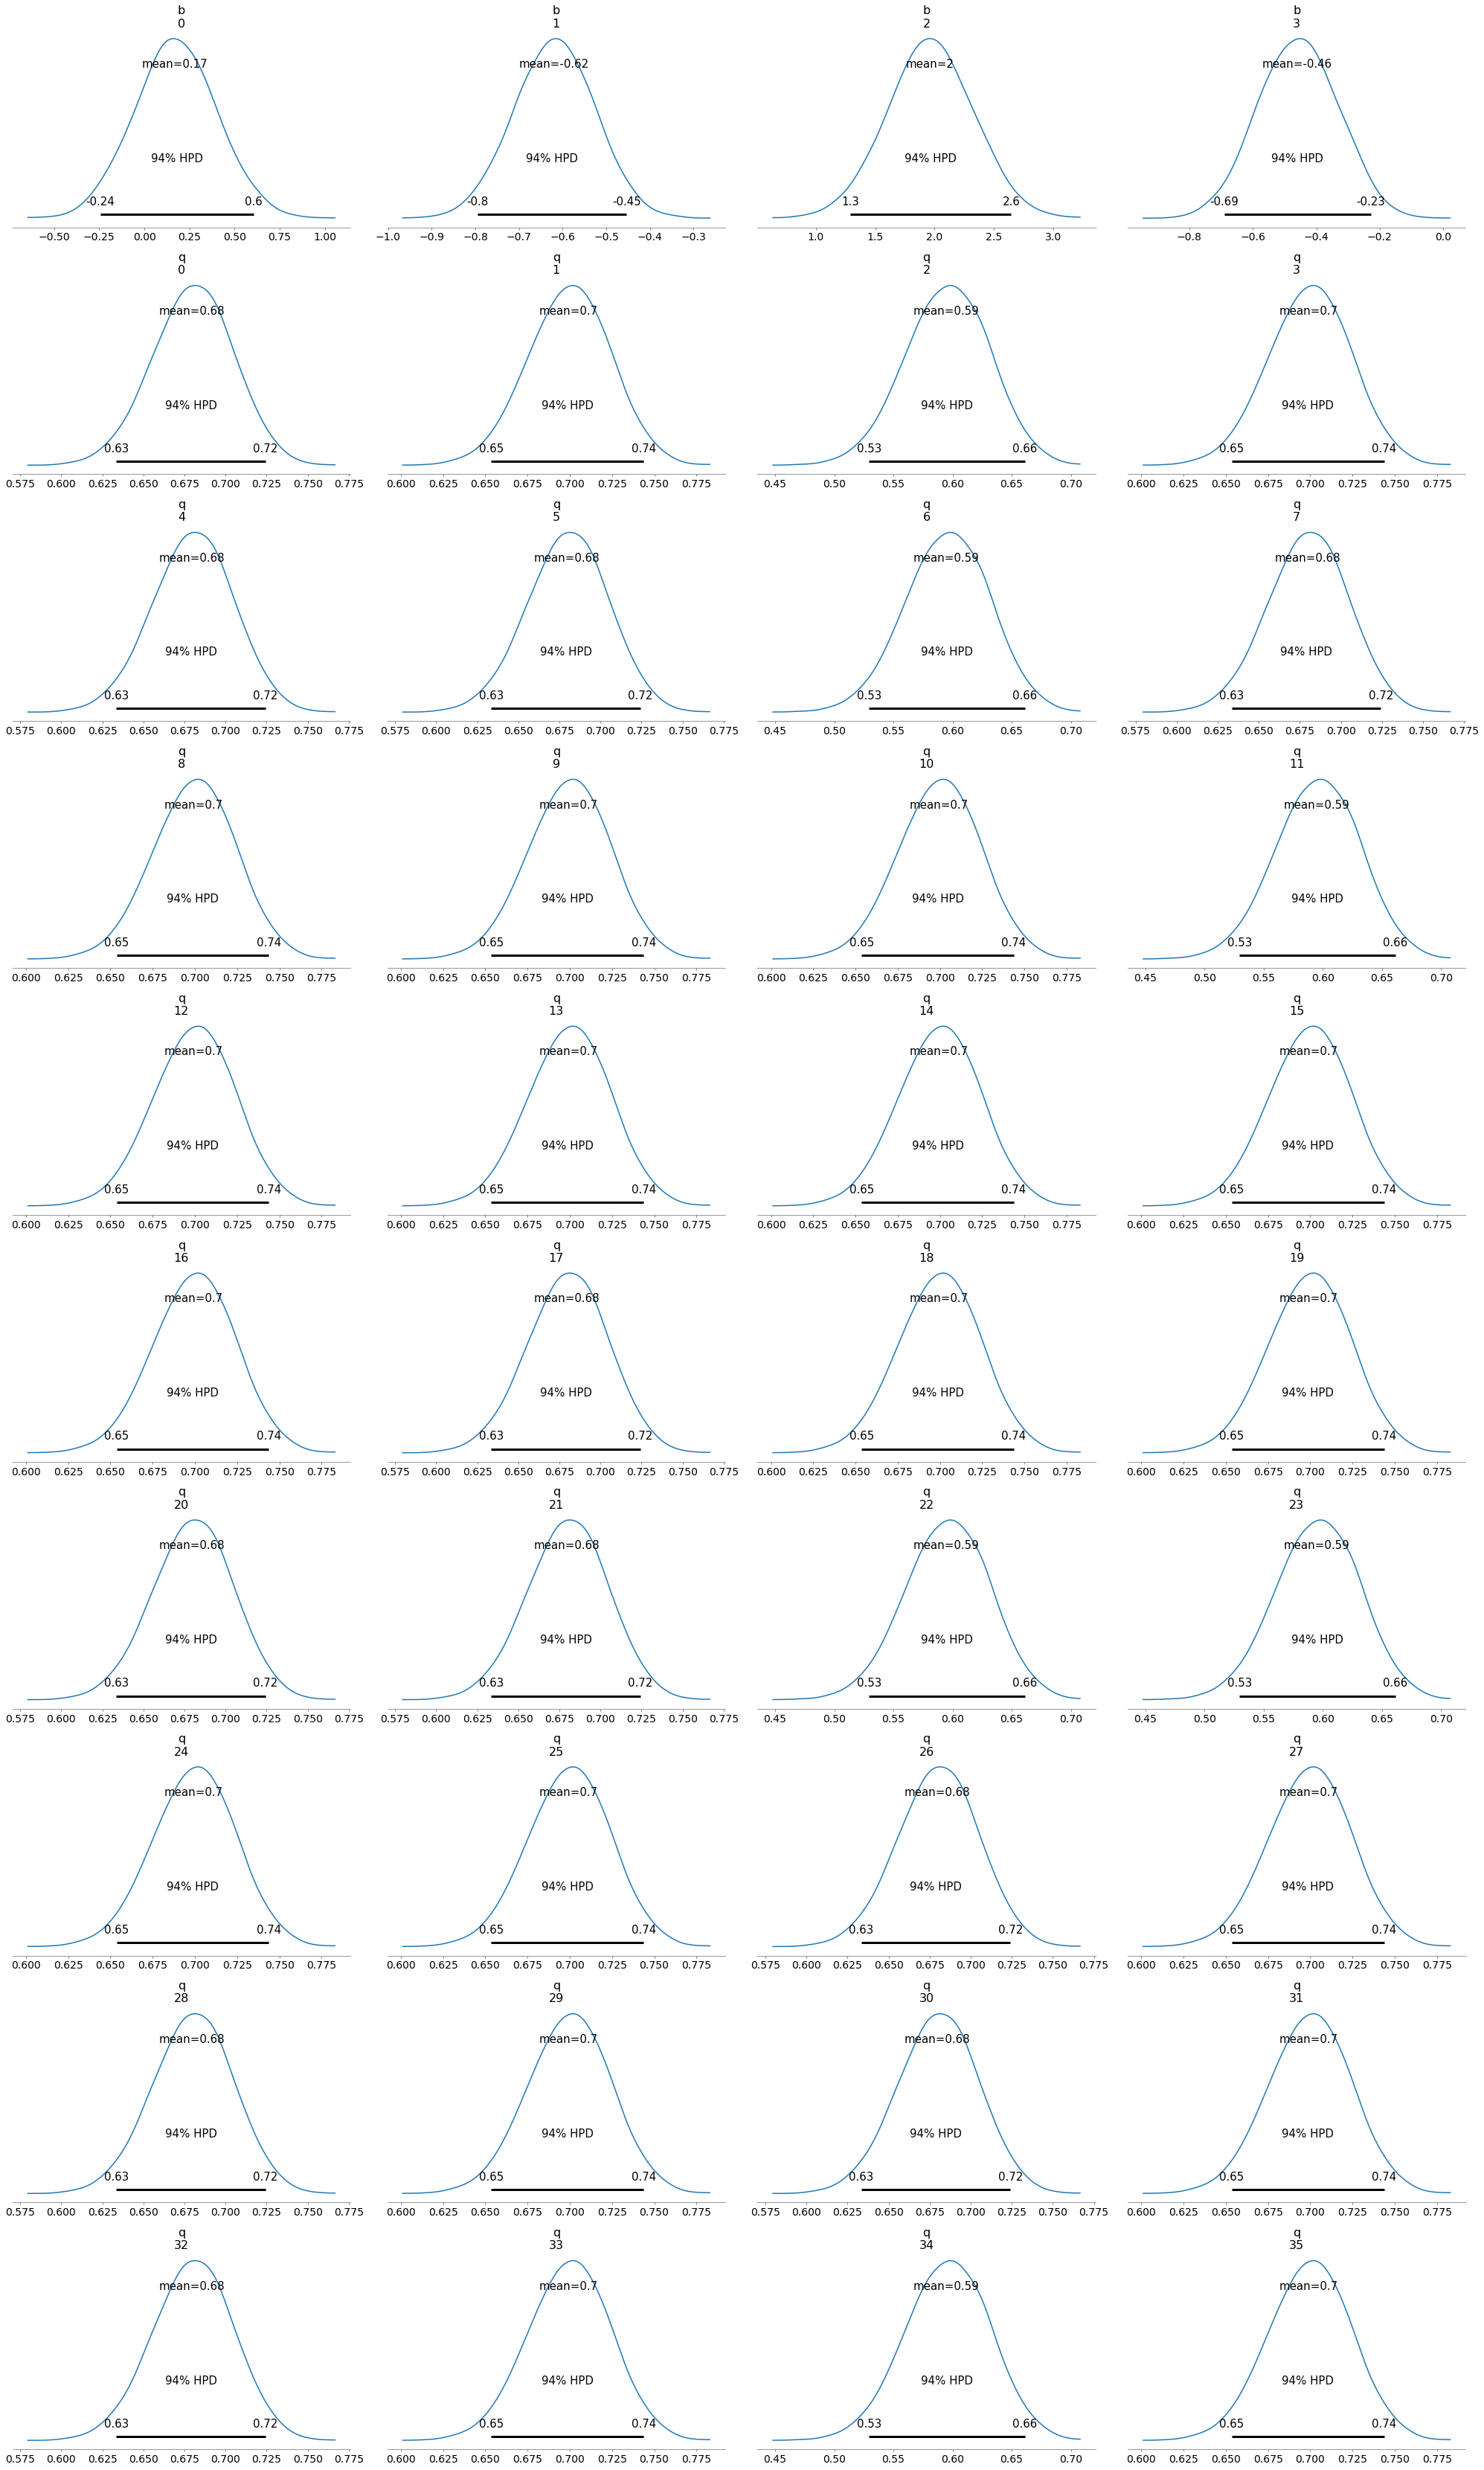

In [9]:
arviz.plot_posterior(fit);

In [10]:
# modelを記述した読み込みたいstanファイル
read_stanmodel = "model5-5-optimized.stan"
# モデルをセーブしておくpickleファイル
read_file = "model5-5-optimized.pkl"

stan_path = Path(os.getcwd(),"model", "stanmodel", read_stanmodel)
pickle_path = Path(os.getcwd(),"model", "model_pkl", read_file)

try:
    with open(pickle_path, "rb") as f:
        print("loading...", pickle_path)
        stanmodel_optimized = pickle.load(f)

except FileNotFoundError:
    print("save path to stan file is ", stan_path)
    stanmodel_optimized = pystan.StanModel(
        file = str(stan_path),
    )
    with open(pickle_path, "wb") as f:
        pickle.dump(stanmodel, f)
        print("saving finished...")

loading... /Users/chibadaimare/Desktop/Bayes_Stan/stan_with_python/model/model_pkl/model5-5-optimized.pkl


In [11]:
%%time

fit = stanmodel_optimized.sampling(
    data=standata,
    iter=3000,
    warmup=300,
    chains=4
)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
CPU times: user 252 ms, sys: 402 ms, total: 654 ms
Wall time: 38.8 s


In [14]:
ms = fit.extract()

In [15]:
print(ms)

OrderedDict([('b', array([[ 0.24296692, -0.47031054,  1.86695352, -0.45721805],
       [ 0.09227142, -0.74745195,  2.10468684, -0.47543334],
       [ 0.40299092, -0.71470496,  1.55797602, -0.27972539],
       ...,
       [-0.1062986 , -0.71634176,  2.49295288, -0.42328357],
       [ 0.51221336, -0.53887469,  1.41559159, -0.51828486],
       [ 0.37178763, -0.75584282,  1.70804158, -0.40106738]])), ('q', array([[0.68903727, 0.7082843 , 0.60583733, ..., 0.66747755, 0.55961023,
        0.55961023],
       [0.67333366, 0.69389413, 0.58490816, ..., 0.59547345, 0.4778161 ,
        0.4778161 ],
       [0.7077637 , 0.71919916, 0.65943272, ..., 0.61289178, 0.54481905,
        0.54481905],
       ...,
       [0.66130461, 0.67999964, 0.58187776, ..., 0.60141665, 0.49702197,
        0.49702197],
       [0.71031934, 0.73117505, 0.61829263, ..., 0.66241088, 0.53886436,
        0.53886436],
       [0.70699802, 0.72333438, 0.63645129, ..., 0.61335226, 0.51508492,
        0.51508492]])), ('lp__', array(